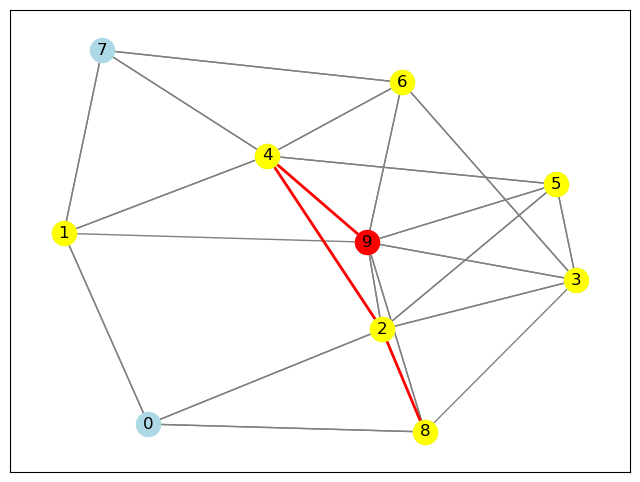

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import random
from matplotlib.animation import FFMpegWriter

# Create a graph
G = nx.gnp_random_graph(n=10, p=0.5)

# Choose a starting node
current_node = random.choice(list(G.nodes))
walk = [current_node]
visited_nodes = {current_node}
visited_edges = set()

# Function to perform a step in the random walk
def step():
    global current_node, visited_nodes, visited_edges
    neighbors = list(G.neighbors(current_node))
    if neighbors:  # Check if the current node has any neighbors
        next_node = random.choice(neighbors)
        visited_nodes.update([current_node, next_node])
        visited_edges.add((current_node, next_node))  # Add the edge to the visited set
        current_node = next_node
        walk.append(current_node)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positions for all nodes

# Function to update the plot
def update(frame):
    step()
    ax.clear()

    # Draw all visited nodes and edges
    nx.draw_networkx_nodes(G, pos, nodelist=list(visited_nodes), node_color='lightblue', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=list(visited_edges), edge_color='gray', ax=ax)

    # Highlight the current node and its neighbors
    nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='red', ax=ax)
    nx.draw_networkx_nodes(G, pos, nodelist=list(G.neighbors(current_node)), node_color='yellow', ax=ax)

    # Highlight the last three edges of the walk
    last_edges = [(walk[i], walk[i + 1]) for i in range(max(0, len(walk) - 4), len(walk) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=last_edges, width=2, edge_color='red', ax=ax)

    # Labels for all visited nodes
    labels = {n: n for n in visited_nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=12, ax=ax)

    return ax,

# Specify the writer
writer = FFMpegWriter(fps=5, metadata=dict(artist='Me'), bitrate=1800)

# Create the animation and save it
ani = animation.FuncAnimation(fig, update, frames=100, interval=200, blit=False)
ani.save('random_walk_graph_restricted_view.mp4', writer=writer)

# Uncomment the below line if you want to display the animation as well
# plt.show()


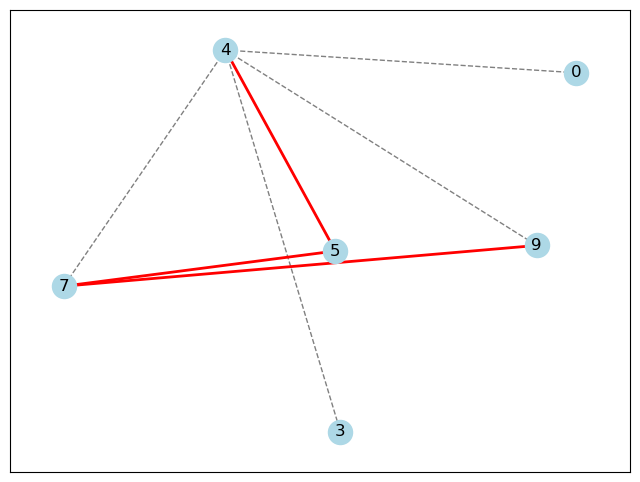

In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import random
from matplotlib.animation import FFMpegWriter

# Create a graph
G = nx.gnp_random_graph(n=10, p=0.5)

# Choose a starting node
current_node = random.choice(list(G.nodes))
walk = [current_node]
visited_edges = set()

# Function to perform a step in the random walk
def step():
    global current_node, visited_edges
    neighbors = list(G.neighbors(current_node))
    if neighbors:  # Check if the current node has any neighbors
        next_node = random.choice(neighbors)
        visited_edges.add((current_node, next_node))  # Add the edge to the visited set
        current_node = next_node
        walk.append(current_node)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(G)  # Positions for all nodes

# Function to update the plot
def update(frame):
    step()
    ax.clear()

    # Nodes and edges to be displayed
    display_nodes = set([current_node] + list(G.neighbors(current_node)))
    possible_edges = [(current_node, n) for n in G.neighbors(current_node)]
    last_edges = [(walk[i], walk[i + 1]) for i in range(max(0, len(walk) - 4), len(walk) - 1)]

    # Draw the current node, its neighbors, and the possible and last three edges
    nx.draw_networkx_nodes(G, pos, nodelist=list(display_nodes), node_color='lightblue', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=possible_edges, edge_color='gray', ax=ax, style='dashed')
    nx.draw_networkx_edges(G, pos, edgelist=last_edges, width=2, edge_color='red', ax=ax)

    # Labels for the current node and its neighbors
    labels = {n: n for n in display_nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=12, ax=ax)

    return ax,

# Specify the writer
writer = FFMpegWriter(fps=5, metadata=dict(artist='Me'), bitrate=1800)

# Create the animation and save it
ani = animation.FuncAnimation(fig, update, frames=50, interval=200, blit=False)
ani.save('focused_random_walk_graph.mp4', writer=writer)

# Uncomment the below line if you want to display the animation as well
# plt.show()


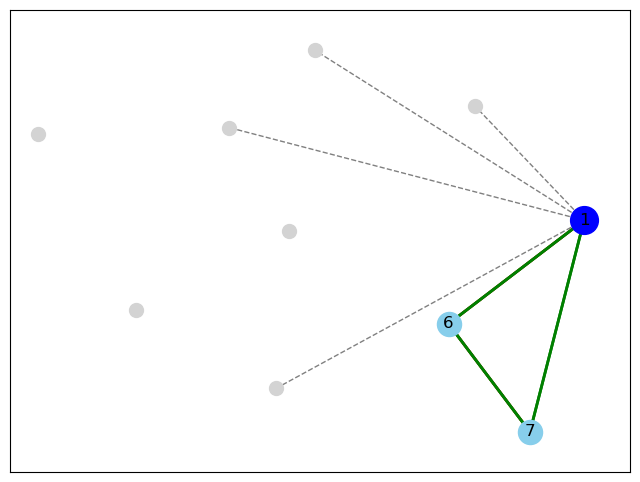

In [14]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import random
from matplotlib.animation import FFMpegWriter

# Create a graph
G = nx.gnp_random_graph(n=10, p=0.5)

# Choose a starting node
current_node = random.choice(list(G.nodes))
walk = [current_node]

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Fixed layout for consistent positioning

# Function to perform a step in the random walk
def step():
    global current_node
    neighbors = list(G.neighbors(current_node))
    if neighbors:  # Check if the current node has any neighbors
        current_node = random.choice(neighbors)
        walk.append(current_node)

# Function to update the plot
def update(frame):
    step()
    ax.clear()

    # Nodes and edges to be displayed
    display_nodes = set(walk[-3:])  # Last two nodes and current node
    possible_edges = [(current_node, n) for n in G.neighbors(current_node)]
    last_edges = [(walk[i], walk[i + 1]) for i in range(max(0, len(walk) - 3), len(walk) - 1)]
    connected_edges = [(n1, n2) for n1 in display_nodes for n2 in display_nodes if n1 != n2 and G.has_edge(n1, n2)]

    # Draw all nodes with a basic style
    nx.draw_networkx_nodes(G, pos, node_color='lightgray', ax=ax, node_size=100)

    # Highlight recent nodes and current node with larger sizes
    nx.draw_networkx_nodes(G, pos, nodelist=list(display_nodes), node_color='skyblue', ax=ax, node_size=300)
    nx.draw_networkx_nodes(G, pos, nodelist=[current_node], node_color='blue', ax=ax, node_size=400)

    # Draw edges
    nx.draw_networkx_edges(G, pos, edgelist=possible_edges, edge_color='gray', ax=ax, style='dashed')
    nx.draw_networkx_edges(G, pos, edgelist=last_edges, width=2, edge_color='red', ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=connected_edges, width=2, edge_color='green', ax=ax)

    # Labels for the recent and current nodes
    labels = {n: n for n in display_nodes}
    nx.draw_networkx_labels(G, pos, labels, font_size=12, ax=ax)

    return ax,

# Specify the writer
writer = FFMpegWriter(fps=5, metadata=dict(artist='Me'), bitrate=1800)

# Create the animation and save it
ani = animation.FuncAnimation(fig, update, frames=20, interval=200, blit=False)
ani.save('enhanced_random_walk_graph.mp4', writer=writer)

# Uncomment the below line if you want to display the animation as well
# plt.show()
